In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Advertising.csv" )

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop("Unnamed: 0" , axis = 1, inplace = True) 

In [5]:
data.sample(5)

,TV,Radio,Newspaper,Sales
39,228.0,37.7,32.0,21.5
63,102.7,29.6,8.4,14.0
56,7.3,28.1,41.4,5.5
28,248.8,27.1,22.9,18.9
164,117.2,14.7,5.4,11.9


In [6]:
data.shape

(200, 4)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot: >

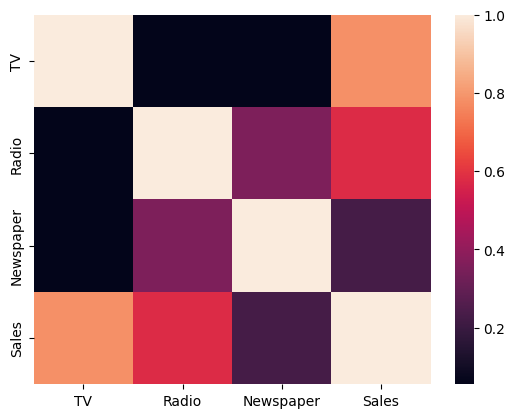

In [12]:
sns.heatmap(data.corr())

<AxesSubplot: xlabel='TV', ylabel='Sales'>

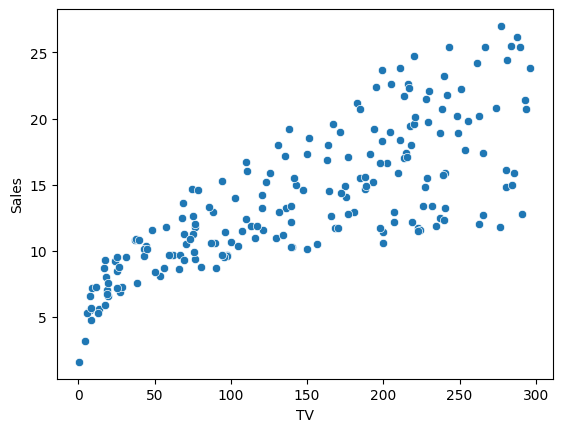

In [13]:
sns.scatterplot(x = data.TV ,y = data.Sales)

<AxesSubplot: >

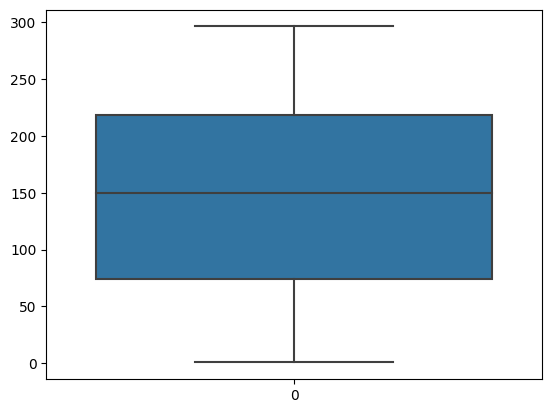

In [14]:
sns.boxplot(data.TV)

<AxesSubplot: xlabel='Radio', ylabel='Sales'>

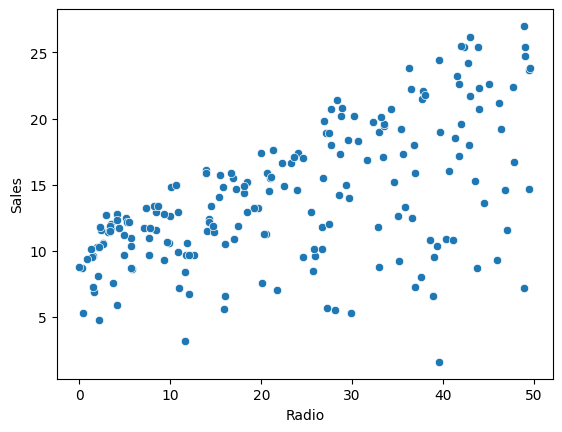

In [15]:
sns.scatterplot(x = data.Radio ,y = data.Sales)

<AxesSubplot: >

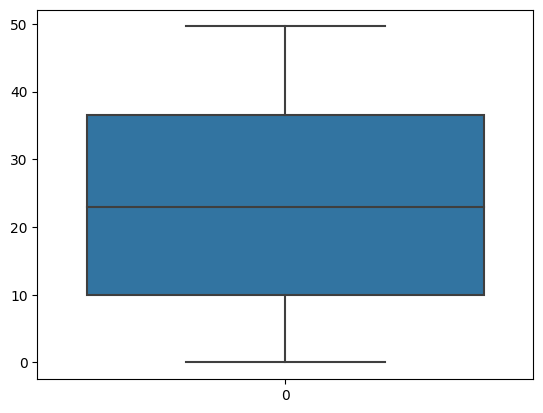

In [16]:
sns.boxplot(data.Radio)

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

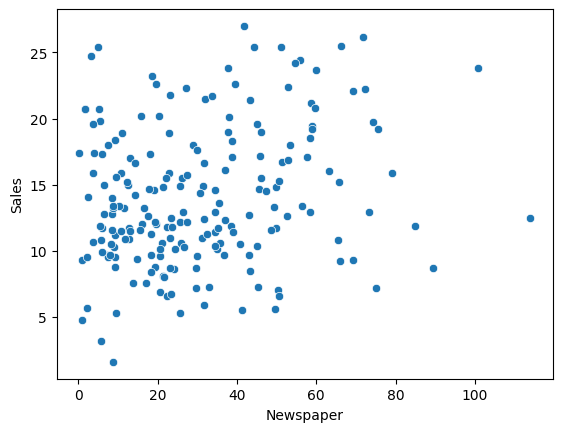

In [17]:
sns.scatterplot(x = data.Newspaper , y = data.Sales)

<AxesSubplot: >

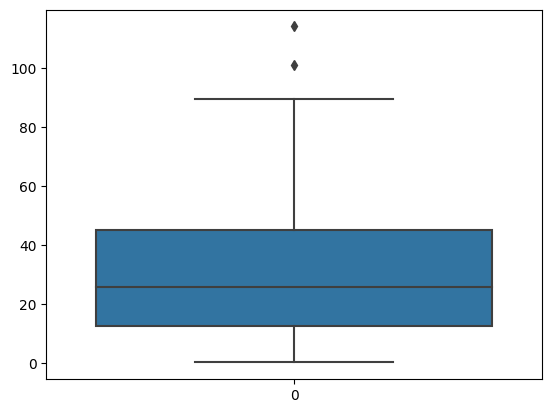

In [18]:
sns.boxplot(data.Newspaper)

In [19]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [20]:
x = data.drop('Sales' , axis = 1)
y = data.Sales

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , AdaBoostRegressor

In [22]:
xtrain , xtest ,ytrain , ytest = train_test_split(x ,y , test_size = 0.2 ,random_state = 42)

In [23]:
pipe = Pipeline([('scaling' , StandardScaler()) , ('model' , GradientBoostingRegressor())])

In [24]:
pipe.fit(xtrain , ytrain)

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', GradientBoostingRegressor())])

In [25]:
ypred = pipe.predict(xtest)

In [26]:
r2_score(ytest , ypred)

0.9835611091230938

In [27]:
# Already we are getting the 98 percentage accuracy so no need to do something else

In [31]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [34]:
pipe.predict([[230.1 , 37.8 , 69.2]])  # predicting from the model

C:\Python 310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([22.0482568])